 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_returns_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path,index_col="Date", infer_datetime_format=True, parse_dates=True
)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path,index_col="Date", infer_datetime_format=True, parse_dates=True
)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path,index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$','').str.replace(',','').astype(float)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [15]:
# Calculate Daily Returns
sp_tsx_daily_returns_df = sp_tsx_history_df.pct_change()
sp_tsx_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
sp_tsx_daily_returns_df.dropna(inplace=True)
sp_tsx_daily_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns_df.rename(columns={'Close':'SP Daily Returns'},inplace=True)
sp_tsx_daily_returns_df.head()

,SP Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df,sp_tsx_daily_returns_df], axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

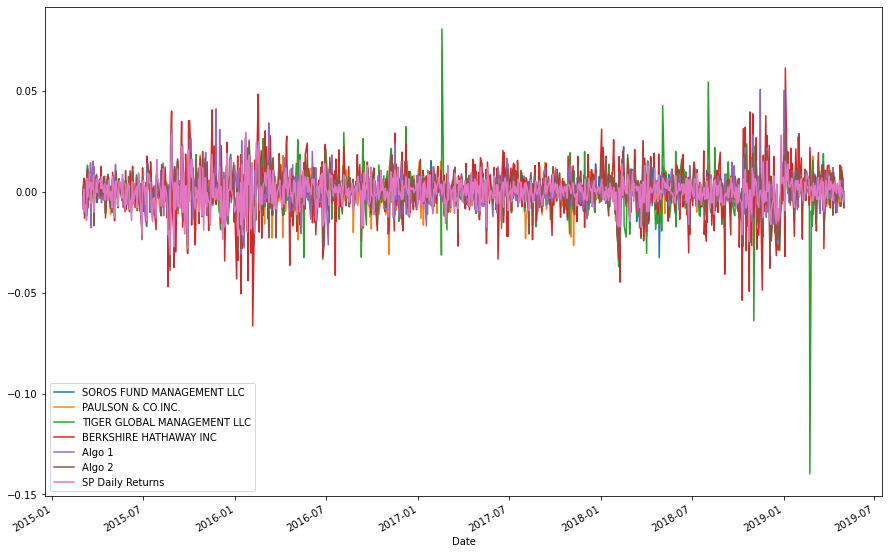

In [19]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

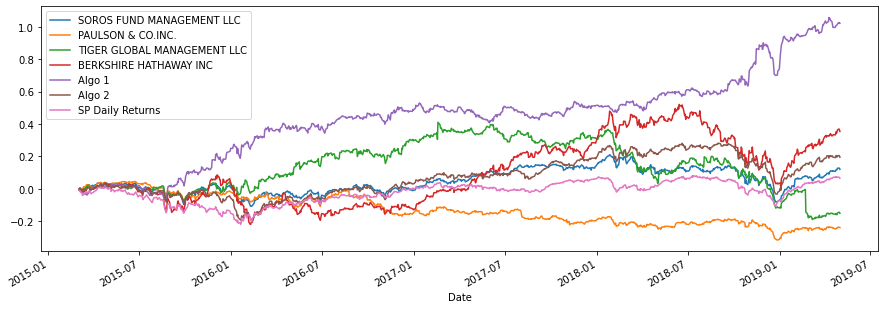

In [20]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1+combined_returns_df).cumprod()-1
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(15,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

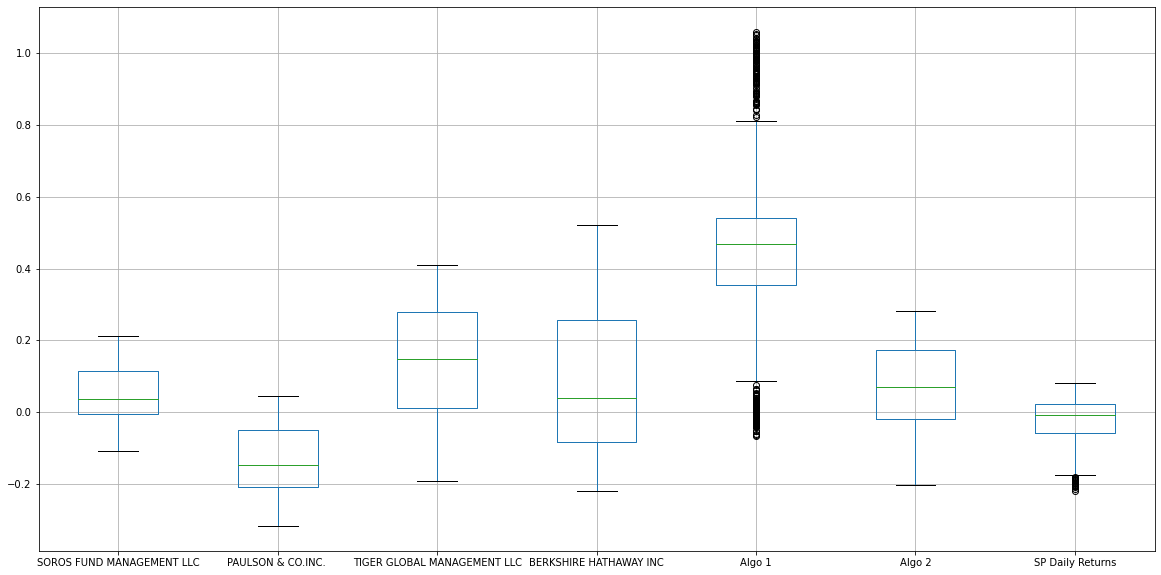

In [21]:
# Box plot to visually show risk
combined_cumulative_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std=combined_returns_df.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP Daily Returns               0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_60_risk = combined_returns_std['SP Daily Returns']
# Determine which portfolios are riskier than the S&P TSX 60
combined_returns_std > sp_tsx_60_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP Daily Returns               False
dtype: bool

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
combined_returns_anu_std = combined_returns_std * np.sqrt(252)
combined_returns_anu_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP Daily Returns               0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

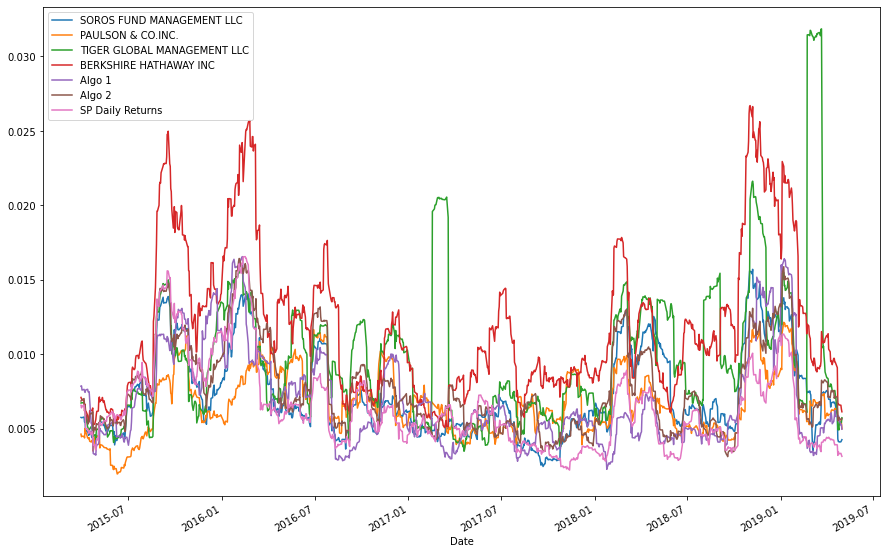

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_rolling = combined_returns_df.rolling(window=21).std()
combined_returns_rolling
# Plot the rolling standard deviation
combined_returns_rolling.plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

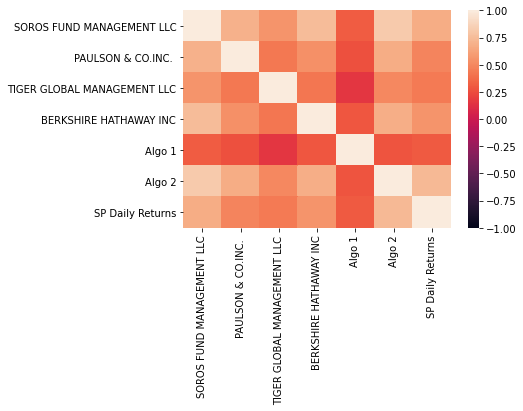

In [26]:
# Calculate the correlation
combined_returns_correlation = combined_returns_df.corr()
combined_returns_correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(combined_returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

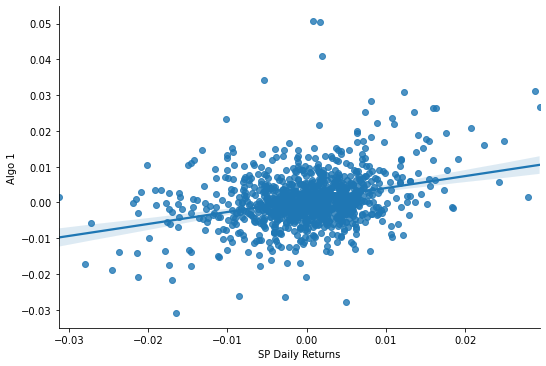

In [27]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns_df['Algo 1'].cov(combined_returns_df['SP Daily Returns'])
# Calculate variance of S&P TSX
sp_tsx_var = combined_returns_df['SP Daily Returns'].var()
# Computing beta
algo1_beta = algo1_covariance/sp_tsx_var
# Plot beta trend
sns.lmplot(x='SP Daily Returns', y='Algo 1', data=combined_returns_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [28]:
# Use `ewm` to calculate the rolling window
times = combined_returns_df.loc[['2015-03-02', '2015-03-30'],:]
combined_returns_df.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).mean()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: DatetimeIndex(['2015-03-02'], dtype='datetime64[ns]', name='Date', freq=None). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
combined_returns_sharp_ratio = (
    combined_returns_df.mean() * 252 / (combined_returns_df.std() * np.sqrt(252)))
combined_returns_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP Daily Returns               0.195550
dtype: float64

<AxesSubplot:>

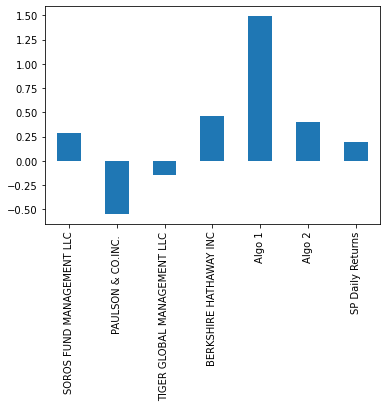

In [30]:
# Visualize the sharpe ratios as a bar plot
combined_returns_sharp_ratio.columns = ['company name','sharp ratio']
combined_returns_sharp_ratio.plot.bar(x='company name',y='sharp ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [31]:
# algorithmic strategies did out perform both the market and whale portfolios as it had a higher sharp ratio which represent risk-adjusted
# returnsk, the higher the sharp ratio, the better the return it has relative to the risk taken

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [57]:
# Reading data from 1st stock
shop_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/shop_historical.csv")
shop_df = pd.read_csv(shop_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [86]:
# Reading data from 2nd stock
otex_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/otex_historical.csv")
otex_df = pd.read_csv(otex_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [87]:
# Reading data from 3rd stock
l_path = Path("C:/Users/Harri/Desktop/study files/Untitled Folder/week4/homework/l_historical.csv")
l_df = pd.read_csv(l_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [97]:
# Combine all stocks in a single DataFrame
stocks_returns_df = pd.concat([shop_df,l_df,otex_df], axis="columns", join="inner")
stocks_returns_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [98]:
# Reset Date index
stocks_returns_df.reset_index(drop=True)

,Symbol,Close,Symbol,Close,Symbol,Close
0,SHOP,132.06,L,57.99,OTEX,43.58
1,SHOP,135.15,L,57.41,OTEX,43.07
2,SHOP,137.46,L,57.42,OTEX,42.91
3,SHOP,137.26,L,57.42,OTEX,42.57
4,SHOP,139.51,L,56.86,OTEX,42.16
...,...,...,...,...,...,...
496,SHOP,513.22,L,67.90,OTEX,58.68
497,SHOP,511.62,L,67.68,OTEX,57.89
498,SHOP,525.39,L,67.67,OTEX,57.44
499,SHOP,534.76,L,67.78,OTEX,57.70


In [99]:
# Reorganize portfolio data by having a column per symbol
stocks_returns_df.drop(columns=['Symbol'],inplace=True)
stocks_returns_df.columns=['Shop','L','Otex']
stocks_returns_df.head()

,Shop,L,Otex
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [101]:
# Calculate daily returns
stocks_daily_returns_df = stocks_returns_df.pct_change()
# Drop NAs
stocks_daily_returns_df.dropna(inplace=True)
# Display sample data
stocks_daily_returns_df.head()

,Shop,L,Otex
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [161]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = stocks_daily_returns_df.dot(weights)
# Display sample data
portfolio_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [163]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns1_df = pd.concat([portfolio_returns,combined_returns_df], axis="columns", join="inner")
combined_returns1_df.columns.values[0] = 'port'
combined_returns1_df.head()

,port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Daily Returns
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [164]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns1_df.dropna(inplace=True)

combined_returns1_df.head()

,port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Daily Returns
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [165]:
# Calculate the annualized `std`
combined_returns1_anu_std=combined_returns1_df.std() * np.sqrt(252)
combined_returns1_anu_std

port                           0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP Daily Returns               0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

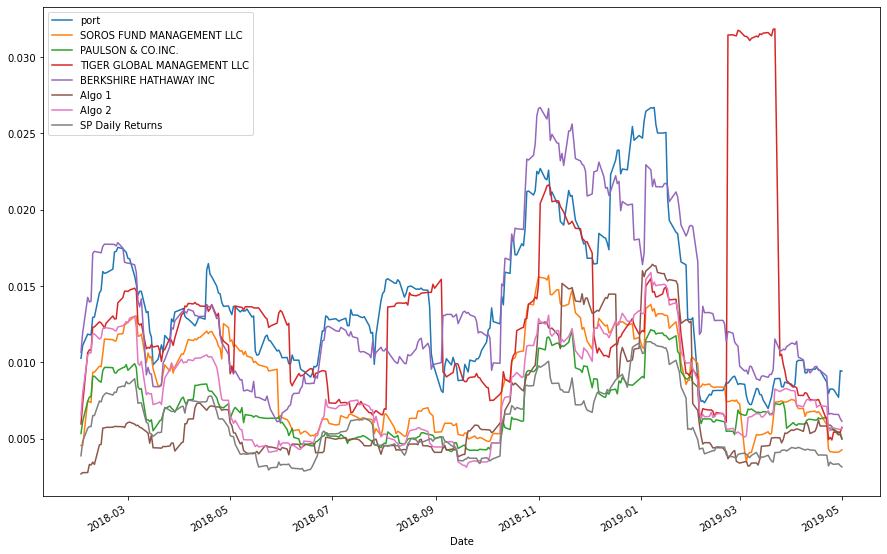

In [166]:
# Calculate rolling standard deviation
combined_returns1_rolling = combined_returns1_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_returns1_rolling.plot(figsize=(15,10))

In [167]:
# Calculate and plot the correlation
Correlation=combined_returns1_df.corr()
Correlation.head()

,port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Daily Returns
port,1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

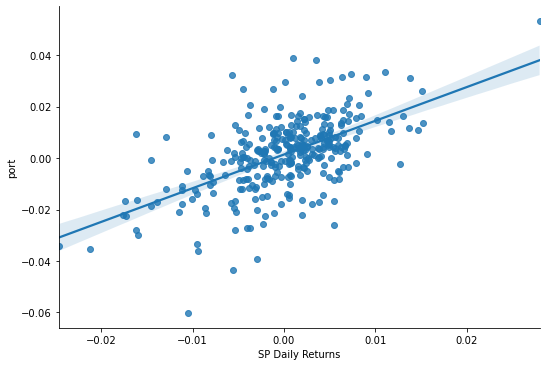

In [168]:
# Calculate and plot Beta
portfolio_covariance = combined_returns1_df['port'].cov(combined_returns1_df['SP Daily Returns'])
sp_tsx_var = combined_returns1_df['SP Daily Returns'].var()
portfolio_beta = portfolio_covariance/sp_tsx_var
# Plot beta trend
sns.lmplot(x='SP Daily Returns', y='port', data=combined_returns1_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Calculate Annualzied Sharpe Ratios
combined_returns1_sharp_ratio = ( combined_returns1_df.mean() * 252 / (combined_returns1_df.std() * np.sqrt(252)))
combined_returns1_sharp_ratio

port                           1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP Daily Returns               0.034651
dtype: float64

<AxesSubplot:>

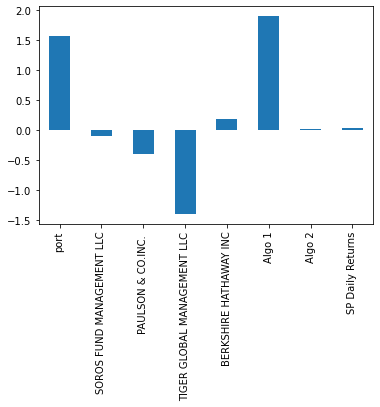

In [170]:
# Visualize the sharpe ratios as a bar plot
combined_returns1_sharp_ratio.columns = ['company name','sharp ratio']
combined_returns1_sharp_ratio.plot.bar(x='company name',y='sharp ratio')

### How does your portfolio do?

Write your answer here!

#my portfolio did better than every other portfolio except for Algo1